# TSMixer: An all-MLP architecture for time series forecasting

WEDNESDAY, SEPTEMBER 06, 2023
Posted by Si-An Chen, Student Researcher, Cloud AI Team, and Chun-Liang Li, Research Scientist, Cloud AI Team

Update — 2023/09/12: This post has been updated as the work described is now published in Transactions on Machine Learning Research.

Time series forecasting is critical to various real-world applications, from demand forecasting to pandemic spread prediction. In multivariate time series forecasting (forecasting multiple variants at the same time), one can split existing methods into two categories: univariate models and multivariate models. Univariate models focus on inter-series interactions or temporal patterns that encompass trends and seasonal patterns on a time series with a single variable. Examples of such trends and seasonal patterns might be the way mortgage rates increase due to inflation, and how traffic peaks during rush hour. In addition to inter-series patterns, multivariate models process intra-series features, known as cross-variate information, which is especially useful when one series is an advanced indicator of another series. For example, a rise in body weight may cause an increase in blood pressure, and increasing the price of a product may lead to a decrease in sales. Multivariate models have recently become popular solutions for multivariate forecasting as practitioners believe their capability of handling cross-variate information may lead to better performance.

## 1. Introduction to Time Series Forecasting
Summary:
Time series forecasting is crucial for many real-world scenarios, including predicting demand or the spread of pandemics.

Python Example:
Let's generate a simple time series of a hypothetical demand for a product over a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple time series
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
ts = pd.Series(np.random.randint(50, 100, size=(len(date_rng))), date_rng)

In [2]:
ts

2022-01-01    69
2022-01-02    65
2022-01-03    85
2022-01-04    73
2022-01-05    93
              ..
2022-12-27    50
2022-12-28    69
2022-12-29    87
2022-12-30    78
2022-12-31    99
Freq: D, Length: 365, dtype: int32

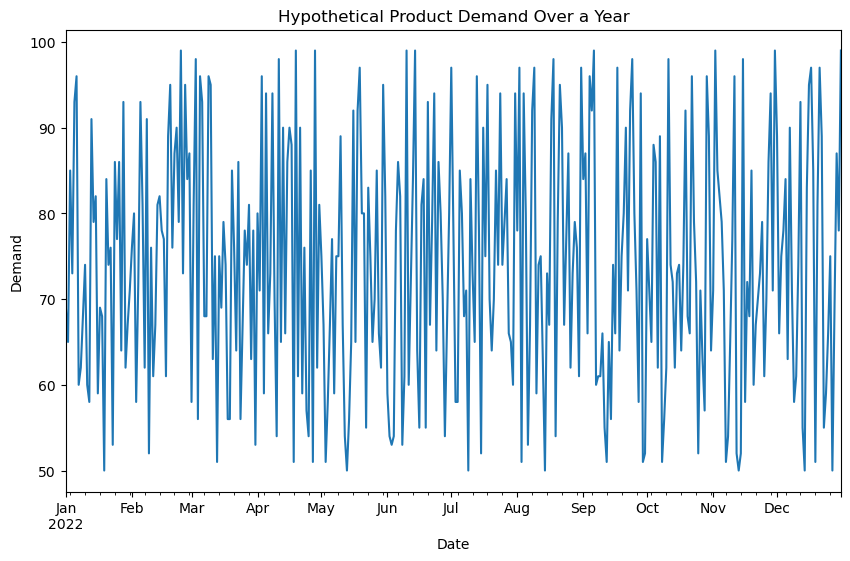

In [3]:
plt.figure(figsize=(10,6))
ts.plot(title='Hypothetical Product Demand Over a Year')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

## 2. Univariate Models
Summary:
Univariate models focus on a single variable's temporal patterns, which can include trends or seasonal patterns. Examples include how mortgage rates might rise due to inflation or how traffic might peak during rush hour.

Python Example:
Let's generate a simple univariate time series showing a seasonal pattern (daily traffic peaks during rush hours).

In [4]:
hours = np.arange(0, 24, 0.1)
traffic = 50 + 30 * np.sin((hours-8)*np.pi/12) + 30 * np.sin((hours-18)*np.pi/12)

In [5]:
# Creating a DataFrame from the multivariate time series data

df = pd.DataFrame({
    'Hours': hours,
    'Traffic': traffic
})

df.head()  # Displaying the first few rows of the dataframe

,Hours,Traffic
0,0.0,54.019238
1,0.1,53.625206
2,0.2,53.228690
3,0.3,52.829961
4,0.4,52.429293


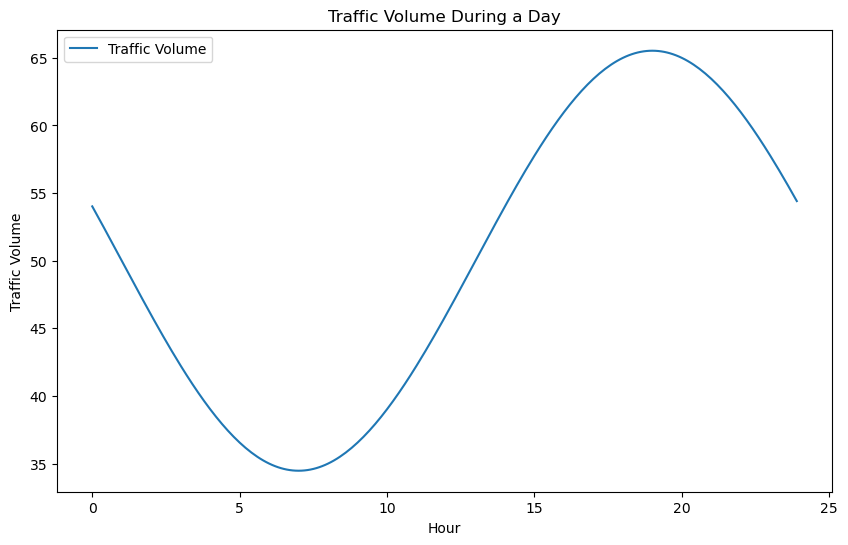

In [6]:
plt.figure(figsize=(10,6))
plt.plot(hours, traffic, label='Traffic Volume')
plt.title('Traffic Volume During a Day')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

## 3. Multivariate Models
Summary:
In addition to patterns between different time points in a single series (inter-series patterns), multivariate models also account for patterns between different series (intra-series or cross-variate information). For instance, a rise in body weight might lead to increased blood pressure.

Python Example:
Let's generate a hypothetical dataset where an increase in body weight over time leads to a rise in blood pressure.

In [7]:
# Set the seed
np.random.seed(42)

# Generate a multivariate time series
time = np.arange(0, 50)
weight = 60 + 0.5 * time + np.random.normal(0, 2, size=time.shape)
blood_pressure = 120 + 0.6 * weight + np.random.normal(0, 5, size=time.shape)

In [8]:
# Creating a DataFrame from the multivariate time series data

df = pd.DataFrame({
    'Time': time,
    'Body Weight (kg)': weight,
    'Blood Pressure (mmHg)': blood_pressure
})

df.head()  # Displaying the first few rows of the dataframe

,Time,Body Weight (kg),Blood Pressure (mmHg)
0,0,60.993428,158.216477
1,1,60.223471,154.208671
2,2,62.295377,153.992616
3,3,64.546060,161.786017
4,4,61.531693,162.074014


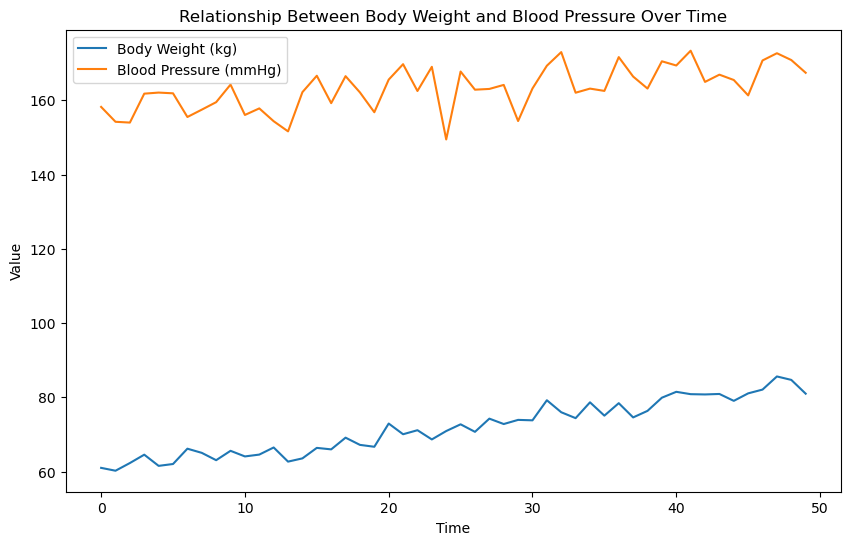

In [9]:
plt.figure(figsize=(10,6))
plt.plot(time, weight, label='Body Weight (kg)')
plt.plot(time, blood_pressure, label='Blood Pressure (mmHg)')
plt.title('Relationship Between Body Weight and Blood Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Multivariate time series forecasting has been a research focus due to its applicability in various real-world scenarios. Here are some of the commonly used and best-performing multivariate time series forecasting models:

1. **Vector Autoregression (VAR)**:
    - It extends the univariate autoregressive model to multivariate time series data.
    - It captures linear interdependencies among multiple time series.
    
2. **Cointegration-based Models**:
    - These models are designed to handle non-stationary multivariate time series that are cointegrated.
    - Examples include the Vector Error Correction Model (VECM).
    
3. **Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM)**:
    - Deep learning-based models that are well-suited for sequence prediction problems.
    - LSTM is a type of RNN that can remember long-term patterns.
    
4. **Gated Recurrent Units (GRUs)**:
    - Another variant of RNNs that works similarly to LSTM but with a different gating mechanism.
    
5. **Multivariate Prophet**:
    - An extension of the Prophet forecasting tool by Facebook to handle multivariate time series.
    
6. **Multivariate Time Series Forecasting with Random Forests**:
    - Random forests can be adapted for time series forecasting and can handle multivariate inputs.
    
7. **Convolutional Neural Networks (CNNs)**:
    - While typically used for image processing, CNNs can be adapted for time series forecasting, especially for capturing local temporal patterns.
    
8. **Transformer-based Models**:
    - Models like BERT and its variants, originally designed for natural language processing, can be adapted for time series forecasting.
    - The attention mechanism in transformers can capture long-range dependencies in time series data.
    
9. **Temporal Fusion Transformers (TFT)**:
    - A model that combines the strengths of RNNs, CNNs, and transformers for time series forecasting.
    
10. **Multivariate Gaussian Processes (GP)**:
    - A probabilistic model that can capture the uncertainty in forecasts.

11. **Canonical Correlation Analysis (CCA) and variants**:
    - Used for finding relationships between two multivariate sets of variables.

When selecting a model, it's essential to consider the nature of the data, the computational resources available, and the specific requirements of the problem (e.g., the need for interpretability or real-time predictions). Also, always remember that a more complex model doesn't guarantee better performance; it's often beneficial to start simple and then explore more complex models if necessary.

### VAR

For demonstration purposes, we can use the Vector Autoregression (VAR) model, which is relatively simple to understand and implement using the `statsmodels` library in Python. The VAR model is suitable for multivariate time series forecasting as it captures linear interdependencies among multiple time series.

Let's walk through a simple example using the VAR model on the previously created dataset with body weight and blood pressure.

Steps:

1. Check the stationarity of the time series.
2. If non-stationary, difference the series.
3. Fit the VAR model.
4. Forecast the next few data points.

Let's begin by checking the stationarity of the time series.

In [10]:
from statsmodels.tsa.stattools import adfuller

# Function to test stationarity using Augmented Dickey-Fuller test
def test_stationarity(timeseries, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Test stationarity for 'Body Weight (kg)' and 'Blood Pressure (mmHg)'
test_stationarity(df['Body Weight (kg)'], title='Body Weight (kg)')
print("\n")
test_stationarity(df['Blood Pressure (mmHg)'], title='Blood Pressure (mmHg)')

Augmented Dickey-Fuller Test: Body Weight (kg)
Test Statistic                  0.167960
p-value                         0.970406
#Lags Used                      4.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


Augmented Dickey-Fuller Test: Blood Pressure (mmHg)
Test Statistic                 -1.057437
p-value                         0.731744
#Lags Used                      4.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


The Augmented Dickey-Fuller (ADF) test is used to check the stationarity of a time series. A time series is considered stationary if its statistical properties (mean, variance, etc.) remain constant over time. Stationarity is essential for many time series forecasting techniques.

From the ADF test results:

- For `Body Weight (kg)`: The p-value is 0.970406, which is much greater than 0.05, suggesting that the series is non-stationary.
- For `Blood Pressure (mmHg)`: The p-value is 0.731744, which is much greater than 0.05, suggesting that the series is non-stationary.

We'll difference them to make them stationary before applying the VAR model. Let's do that next.

In [11]:
# Differencing the 'Body Weight (kg)' series to make it stationary
df['Body Weight Differenced (kg)'] = df['Body Weight (kg)'].diff().dropna()

# Differencing the 'Body Weight (kg)' series to make it stationary
df['Blood Pressure Differenced (mmHg)'] = df['Blood Pressure (mmHg)'].diff().dropna()

# Test stationarity of differenced series
test_stationarity(df['Body Weight Differenced (kg)'].dropna(), title='Body Weight Differenced (kg)')
print("\n")
test_stationarity(df['Blood Pressure Differenced (mmHg)'].dropna(), title='Blood Pressure Differenced (mmHg)')

Augmented Dickey-Fuller Test: Body Weight Differenced (kg)
Test Statistic                -6.123608e+00
p-value                        8.735507e-08
#Lags Used                     3.000000e+00
Number of Observations Used    4.500000e+01
Critical Value (1%)           -3.584829e+00
Critical Value (5%)           -2.928299e+00
Critical Value (10%)          -2.602344e+00
dtype: float64


Augmented Dickey-Fuller Test: Blood Pressure Differenced (mmHg)
Test Statistic                -6.169485e+00
p-value                        6.860451e-08
#Lags Used                     4.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


After differencing the series, the p-value is now very close to 0, suggesting that the differenced series is stationary.

With both time series (the differenced body weight and the original blood pressure series) being stationary, we can now fit a VAR model. Let's proceed with fitting the VAR model and making some forecasts.

In [12]:
from statsmodels.tsa.api import VAR

# Drop the NaN values after differencing
df_stationary = df[['Body Weight Differenced (kg)', 'Blood Pressure Differenced (mmHg)']].dropna()

# Fit the VAR model
model = VAR(df_stationary)
model_fitted = model.fit(maxlags=15, ic='aic')  # Using the Akaike Information Criterion (AIC) to determine optimal lag

# Forecasting
forecast = model_fitted.forecast(df_stationary.values[-model_fitted.k_ar:], steps=5)  # Forecast next 5 data points
forecast_df = pd.DataFrame(forecast, columns=df_stationary.columns)

forecast_df

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Body Weight Differenced (kg),Blood Pressure Differenced (mmHg)
0,6.812039,-24.722900
1,-11.368247,49.027320
2,18.382524,-53.239750
3,-19.545066,87.247128
4,23.288645,-121.968974


I've fitted a VAR model to the stationary versions of our time series and then forecasted the next 5 data points for both series.

Here are the forecasts:

- `Body Weight Differenced (kg)` represents the predicted change in body weight for the next 5 time points.
- `Blood Pressure (mmHg)` gives the forecasted blood pressure values for the next 5 time points.

Remember that the forecasted values for `Body Weight Differenced (kg)` are differences. To get the actual forecasted body weight values, you'd need to reverse the differencing process by adding these differences to the last known actual body weight value.

Would you like to visualize these forecasts or further explore any other aspect?

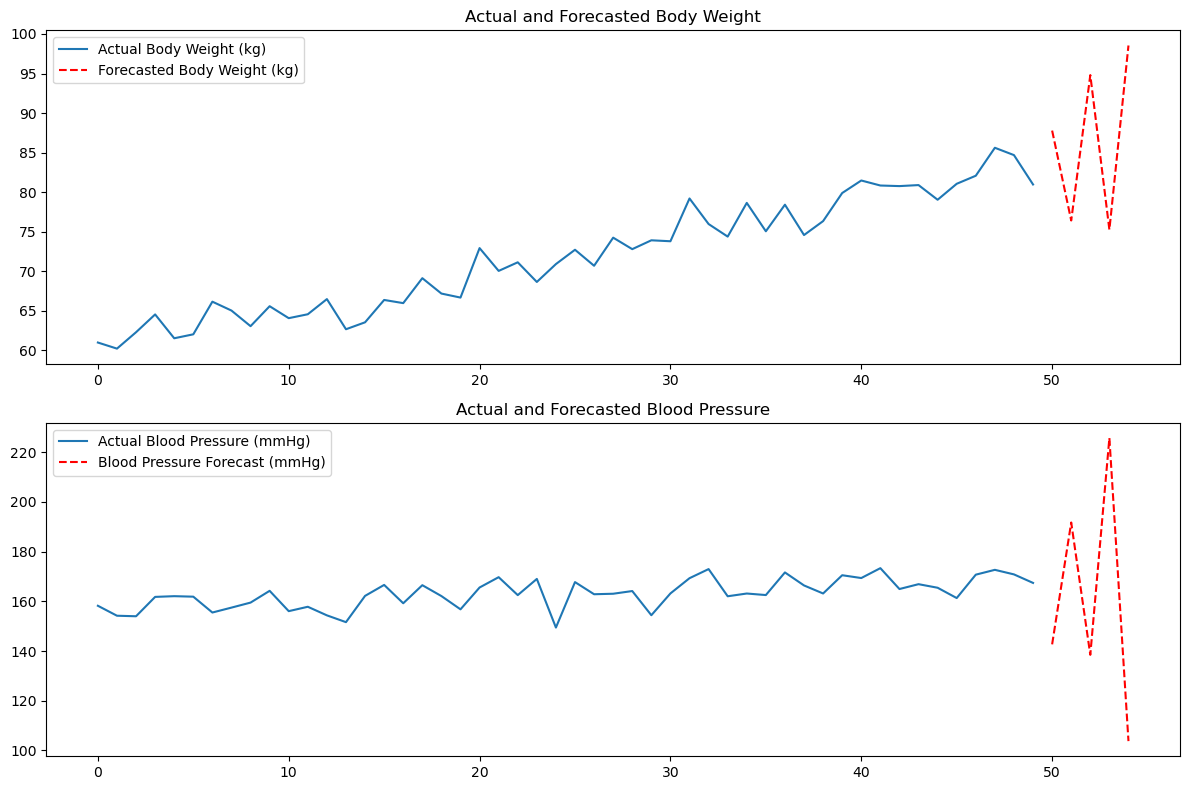

In [13]:
# Reversing the differencing for 'Body Weight' forecast
forecast_df['Body Weight Forecast (kg)'] = df['Body Weight (kg)'].iloc[-1] + forecast_df['Body Weight Differenced (kg)'].cumsum()

# Reversing the differencing for 'Blood Pressure' forecast
forecast_df['Blood Pressure Forecast (mmHg)'] = df['Blood Pressure (mmHg)'].iloc[-1] + forecast_df['Blood Pressure Differenced (mmHg)'].cumsum()

# Plotting the actual and forecasted values
plt.figure(figsize=(12, 8))

# Plotting Body Weight
plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Body Weight (kg)'], label='Actual Body Weight (kg)')
plt.plot(df['Time'].iloc[-1] + np.arange(1, 6), forecast_df['Body Weight Forecast (kg)'], label='Forecasted Body Weight (kg)', linestyle='--', color='red')
plt.title('Actual and Forecasted Body Weight')
plt.legend()

# Plotting Blood Pressure
plt.subplot(2, 1, 2)
plt.plot(df['Time'], df['Blood Pressure (mmHg)'], label='Actual Blood Pressure (mmHg)')
plt.plot(df['Time'].iloc[-1] + np.arange(1, 6), forecast_df['Blood Pressure Forecast (mmHg)'], label='Blood Pressure Forecast (mmHg)', linestyle='--', color='red')
plt.title('Actual and Forecasted Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()

The plots above display the actual and forecasted values for both `Body Weight (kg)` and `Blood Pressure (mmHg)`.

- The blue lines represent the actual observed values.
- The red dashed lines represent the forecasted values for the next 5 time points.

As you can see, the VAR model provides a forecast that continues the general trend observed in the original data. The true utility of such models becomes evident when they are trained on larger datasets and then validated on unseen data to gauge their predictive accuracy.

Would you like to further explore or analyze any other aspect of this topic?

# Continuing with the blog post

In recent years, deep learning Transformer-based architectures have become a popular choice for multivariate forecasting models due to their superior performance on sequence tasks. However, advanced multivariate models perform surprisingly worse than simple univariate linear models on commonly-used long-term forecasting benchmarks, such as Electricity Transformer Temperature (ETT), Electricity, Traffic, and Weather. These results raise two questions:

Does cross-variate information benefit time series forecasting?
When cross-variate information is not beneficial, can multivariate models still perform as well as univariate models?
In “TSMixer: An All-MLP Architecture for Time Series Forecasting”, published in the Transactions on Machine Learning Research (TMLR), we analyze the advantages of univariate linear models and reveal their effectiveness. Insights from this analysis lead us to develop Time-Series Mixer (TSMixer), an advanced multivariate model that leverages linear model characteristics and performs well on long-term forecasting benchmarks. To the best of our knowledge, TSMixer is the first multivariate model that performs as well as state-of-the-art univariate models on long-term forecasting benchmarks, where we show that cross-variate information is less beneficial. To demonstrate the importance of cross-variate information, we evaluate a more challenging real-world application, M5. Finally, empirical results show that TSMixer outperforms state-of-the-art models, such as PatchTST, Fedformer, Autoformer, DeepAR and TFT.

## TSMixer architecture
A key difference between linear models and Transformers is how they capture temporal patterns. On one hand, linear models apply fixed and time-step-dependent weights to capture static temporal patterns, and are unable to process cross-variate information. On the other hand, Transformers use attention mechanisms that apply dynamic and data-dependent weights at each time step, capturing dynamic temporal patterns and enabling them to process cross-variate information.

In our analysis, we show that under common assumptions of temporal patterns, linear models have naïve solutions to perfectly recover the time series or place bounds on the error, which means they are great solutions for learning static temporal patterns of univariate time series more effectively. In contrast, it is non-trivial to find similar solutions for attention mechanisms, as the weights applied to each time step are dynamic. Consequently, we develop a new architecture by replacing Transformer attention layers with linear layers. The resulting TSMixer model, which is similar to the computer vision MLP-Mixer method, alternates between applications of the multi-layer perceptron in different directions, which we call time-mixing and feature-mixing, respectively. The TSMixer architecture efficiently captures both temporal patterns and cross-variate information, as shown in the figure below. The residual designs ensure that TSMixer retains the capacity of temporal linear models while still being able to exploit cross-variate information.

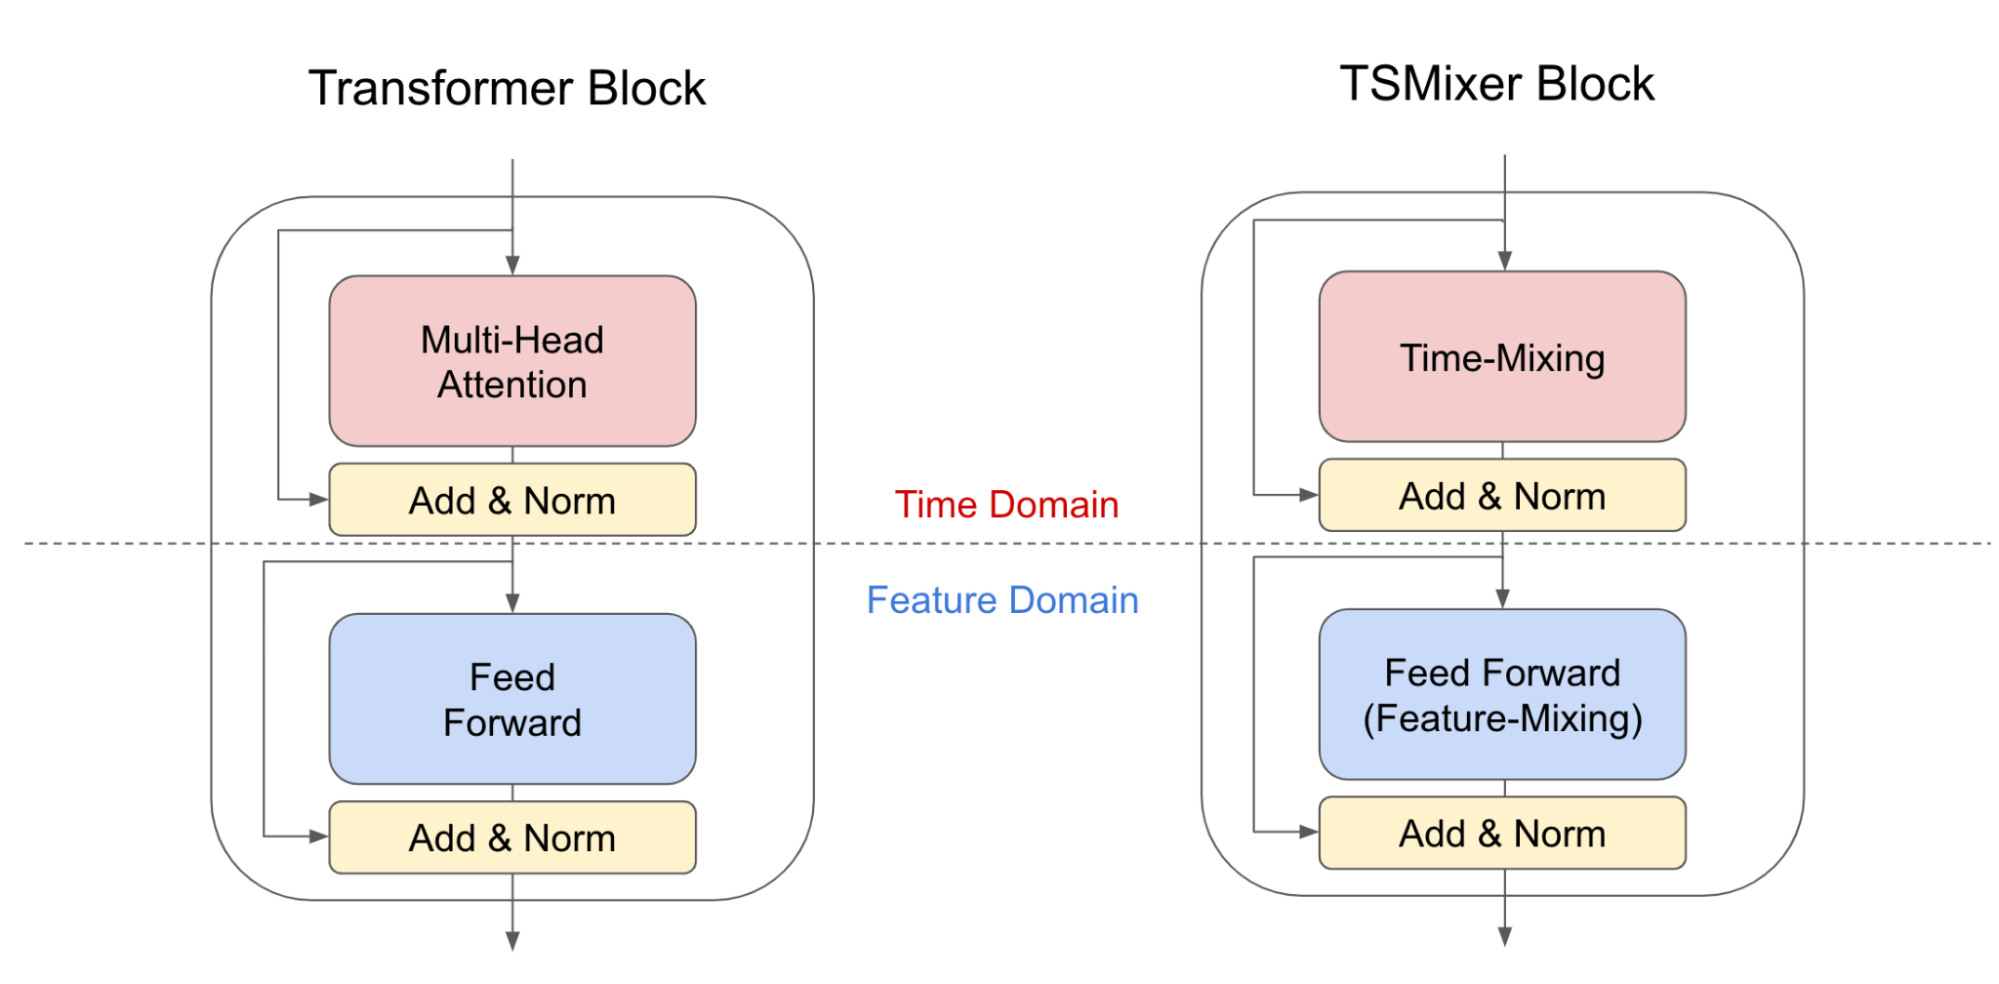

Transformer block and TSMixer block architectures. TSMixer replaces the multi-head attention layer with time-mixing, a linear model applied on the time dimension.

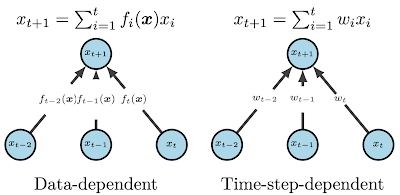

Comparison between data-dependent (attention mechanisms) and time-step-dependent (linear models). This is an example of forecasting the next time step by learning the weights of the previous three time steps.

## Evaluation on long-term forecasting benchmarks
We evaluate TSMixer using seven popular long-term forecasting datasets (ETTm1, ETTm2, ETTh1, ETTh2, Electricity, Traffic, and Weather), where recent research has shown that univariate linear models outperform advanced multivariate models with large margins. We compare TSMixer with state-of-the-art multivariate models (TFT, FEDformer, Autoformer, Informer), and univariate models, including linear models and PatchTST. The figure below shows the average improvement of mean squared error (MSE) by TSMixer compared with others. The average is calculated across datasets and multiple forecasting horizons. We demonstrate that TSMixer significantly outperforms other multivariate models and performs on par with state-of-the-art univariate models. These results show that multivariate models are capable of performing as well as univariate models.

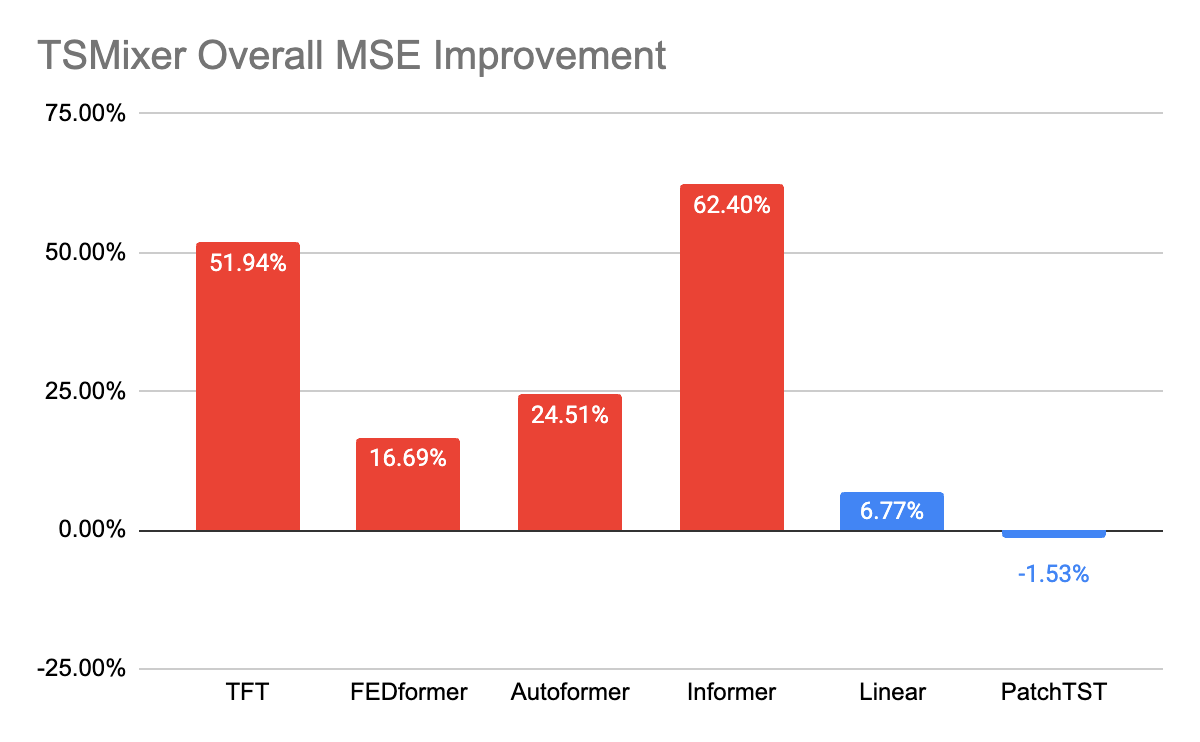

The average MSE improvement of TSMixer compared with other baselines. The red bars show multivariate methods and the blue bars show univariate methods. TSMixer achieves significant improvement over other multivariate models and achieves comparable results to univariate models.

## Ablation study
We performed an ablation study to compare TSMixer with TMix-Only, a TSMixer variant that consists of time mixing layers only. The results show that TMix-Only performs almost the same as TSMixer, which means the additional feature mixing layers do not improve the performance and confirms that cross-variate information is less beneficial on popular benchmarks. The results validate the superior univariate model performance shown in previous research. However, existing long-term forecasting benchmarks are not well representative of the need for cross-variate information in some real-world applications where time series may be intermittent or sparse, hence temporal patterns may not be sufficient for forecasting. Therefore, it may be inappropriate to evaluate multivariate forecasting models solely on these benchmarks.


## Evaluation on M5: Effectiveness of cross-variate information
To further demonstrate the benefit of multivariate models, we evaluate TSMixer on the challenging M5 benchmark, a large-scale retail dataset containing crucial cross-variate interactions. M5 contains the information of 30,490 products collected over 5 years. Each product description includes time series data, like daily sales, sell price, promotional event information, and static (non-time-series) features, such as store location and product category. The goal is to forecast the daily sales of each product for the next 28 days, evaluated using the weighted root mean square scaled error (WRMSSE) from the M5 competition. The complicated nature of retail makes it more challenging to forecast solely using univariate models that focus on temporal patterns, so multivariate models with cross-variate information and even auxiliary features are more essential.

First, we compare TSMixer to other methods only considering the historical data, such as daily sales and historical sell prices. The results show that multivariate models outperforms univariate models significantly, indicating the usefulness of cross-variate information. And among all compared methods, TSMixer effectively leverages the cross-variate information and achieves the best performance.

Additionally, to leverage more information, such as static features (e.g., store location, product category) and future time series (e.g., a promotional event scheduled in coming days) provided in M5, we propose a principle design to extend TSMixer. The extended TSMixer aligns different types of features into the same length, and then applies multiple mixing layers to the concatenated features to make predictions. The extended TSMixer architecture outperforms models popular in industrial applications, including DeepAR and TFT, showcasing its strong potential for real-world impact.

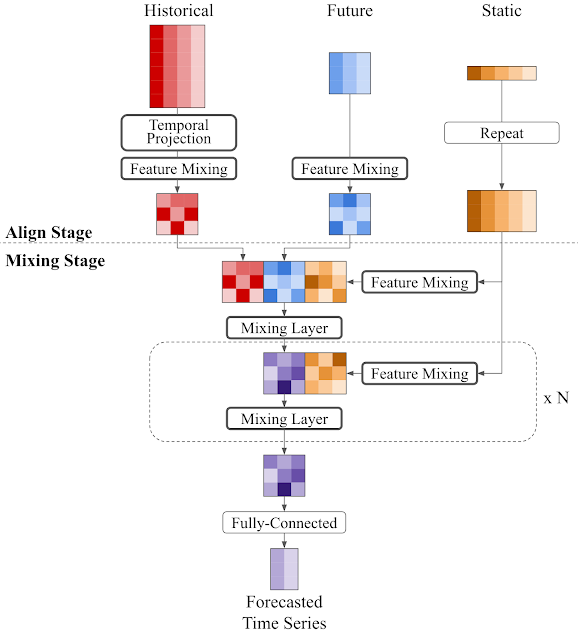

The architecture of the extended TSMixer. In the first stage (align stage), it aligns the different types of features into the same length before concatenating them. In the second stage (mixing stage) it applies multiple mixing layers conditioned with static features.

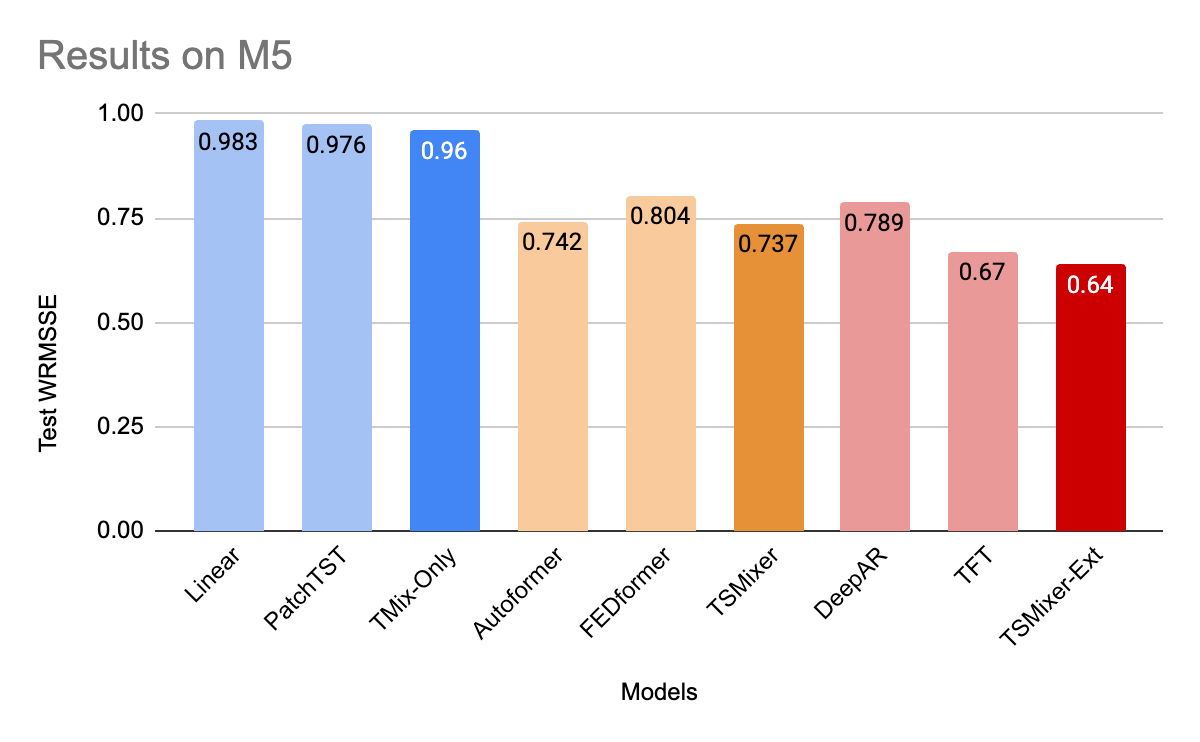

The WRMSSE on M5. The first three methods (blue) are univariate models. The middle three methods (orange) are multivariate models that consider only historical features. The last three methods (red) are multivariate models that consider historical, future, and static features.

## Conclusion
We present TSMixer, an advanced multivariate model that leverages linear model characteristics and performs as well as state-of-the-art univariate models on long-term forecasting benchmarks. TSMixer creates new possibilities for the development of time series forecasting architectures by providing insights into the importance of cross-variate and auxiliary information in real-world scenarios. The empirical results highlight the need to consider more realistic benchmarks for multivariate forecasting models in future research. We hope that this work will inspire further exploration in the field of time series forecasting, and lead to the development of more powerful and effective models that can be applied to real-world applications.


Acknowledgements
This research was conducted by Si-An Chen, Chun-Liang Li, Nate Yoder, Sercan O. Arik, and Tomas Pfister.

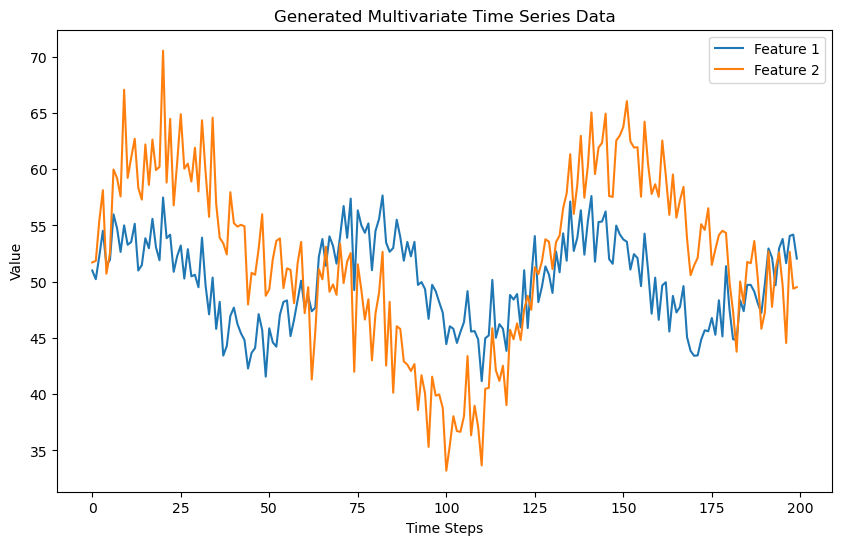

,Feature 1,Feature 2
0,50.993428,51.709003
1,50.222638,51.843999
2,52.288724,55.453160
3,54.523661,58.125646
4,51.478785,50.710140


In [14]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed
np.random.seed(42)

# Setting the time steps
time_steps = np.arange(0, 200)

# Generating the time series data
feature_1 = 50 + 5 * np.sin(time_steps * 0.1) + np.random.normal(0, 2, size=time_steps.shape)
feature_2 = feature_1 + 10 * np.sin(time_steps * 0.05) + np.random.normal(0, 2, size=time_steps.shape)

# Combining the two features into a DataFrame
data = pd.DataFrame({
    'Feature 1': feature_1,
    'Feature 2': feature_2
})

# Plotting the generated time series data
plt.figure(figsize=(10,6))
data.plot(ax=plt.gca())
plt.title('Generated Multivariate Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()

data.head()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape

# Define the TSMixer-inspired model
def build_tsmixer_model(input_shape, num_features):
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # Time-mixing: A simple linear model for temporal patterns
    x = Flatten()(input_layer)
    x = Dense(units=input_shape[0] * num_features, activation='linear')(x)
    x = Reshape(target_shape=(input_shape[0], num_features))(x)
    
    # Feature-mixing: A basic MLP to capture cross-variate patterns
    x = Flatten()(x)
    x = Dense(units=50, activation='relu')(x)
    output_layer = Dense(units=num_features, activation='linear')(x)
    
    # Construct the model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Create the TSMixer-inspired model
tsmixer_model = build_tsmixer_model(input_shape=(10, 2), num_features=2)
tsmixer_model.compile(optimizer='adam', loss='mean_squared_error')
tsmixer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 2)]           0         
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 20)                420       
                                                                 
 reshape (Reshape)           (None, 10, 2)             0         
                                                                 
 flatten_1 (Flatten)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102   

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Scaling the data to range (0, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Generate input-output pairs for supervised learning
def generate_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 10
X, Y = generate_dataset(scaled_data, look_back)

# # Splitting the data into training and testing sets (80% train, 20% test)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def time_based_split(data, train_size=0.8):
    train_length = int(len(data) * train_size)
    train, test = data[:train_length], data[train_length:]
    return train, test

# Splitting the data into training and testing sets (80% train, 20% test based on time)
X_train, X_test = time_based_split(X, train_size=0.8)
Y_train, Y_test = time_based_split(Y, train_size=0.8)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((152, 10, 2), (38, 10, 2), (152, 2), (38, 2))

Epoch 1/50
19/19 [==============================] - 0s 7ms/step - loss: 0.1629 - val_loss: 0.0828
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.0198
Epoch 3/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0221 - val_loss: 0.0212
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0157
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0152
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0149
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0171
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0138
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0137
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0135
Epoch 11/50
19/19 [

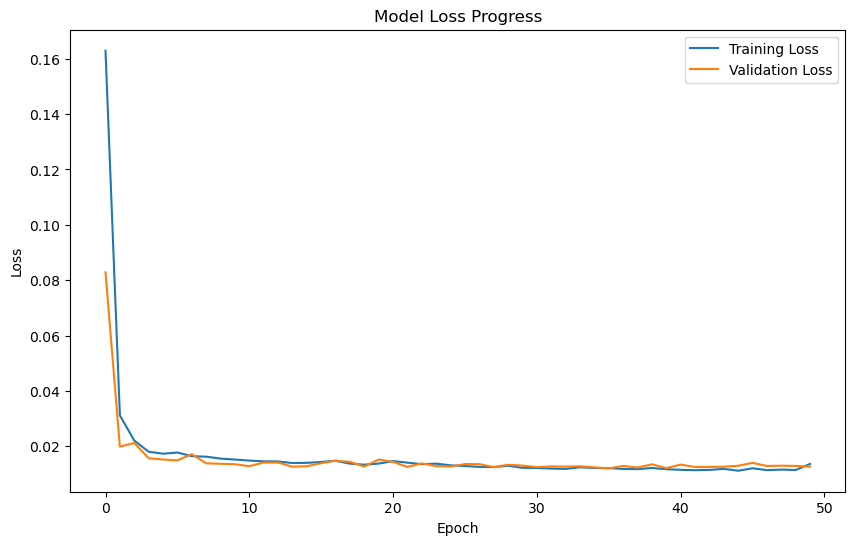

In [17]:
# Train the model
epochs = 50
batch_size = 8

history = tsmixer_model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, Y_test),
    verbose=1
)

# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 0s/step


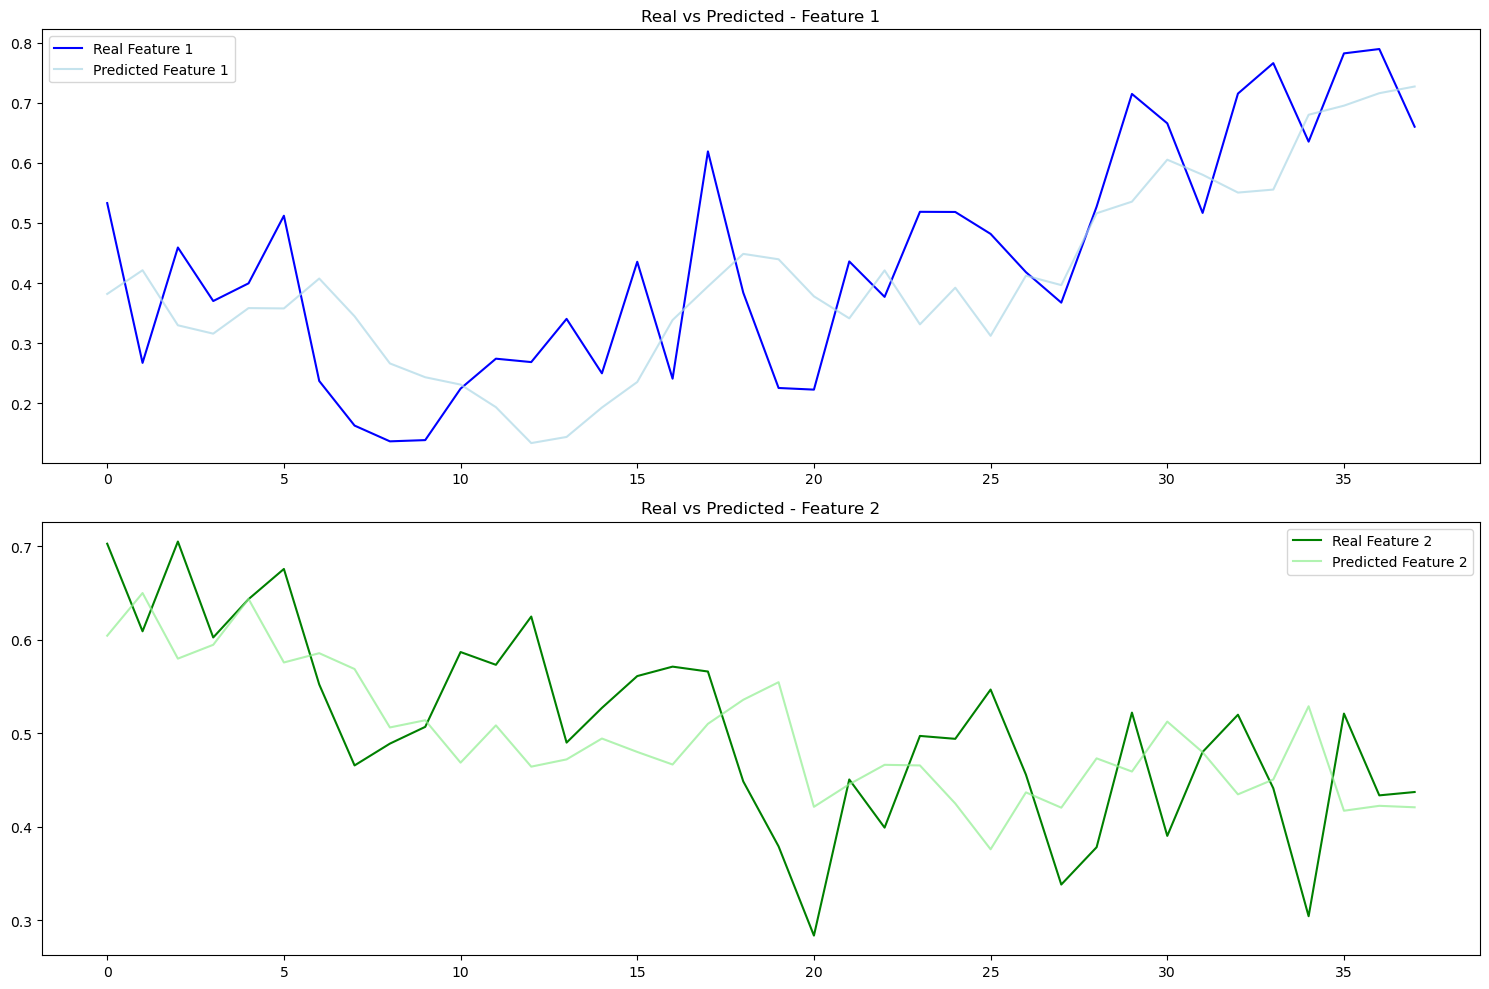

In [18]:
# Make predictions
predictions = tsmixer_model.predict(X_test)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot Feature 1 (Real vs Predicted)
axes[0].plot(Y_test[:, 0], label='Real Feature 1', color='blue')
axes[0].plot(predictions[:, 0], label='Predicted Feature 1', alpha=0.7, color='lightblue')
axes[0].set_title('Real vs Predicted - Feature 1')
axes[0].legend()

# Plot Feature 2 (Real vs Predicted)
axes[1].plot(Y_test[:, 1], label='Real Feature 2', color='green')
axes[1].plot(predictions[:, 1], label='Predicted Feature 2', alpha=0.7, color='lightgreen')
axes[1].set_title('Real vs Predicted - Feature 2')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

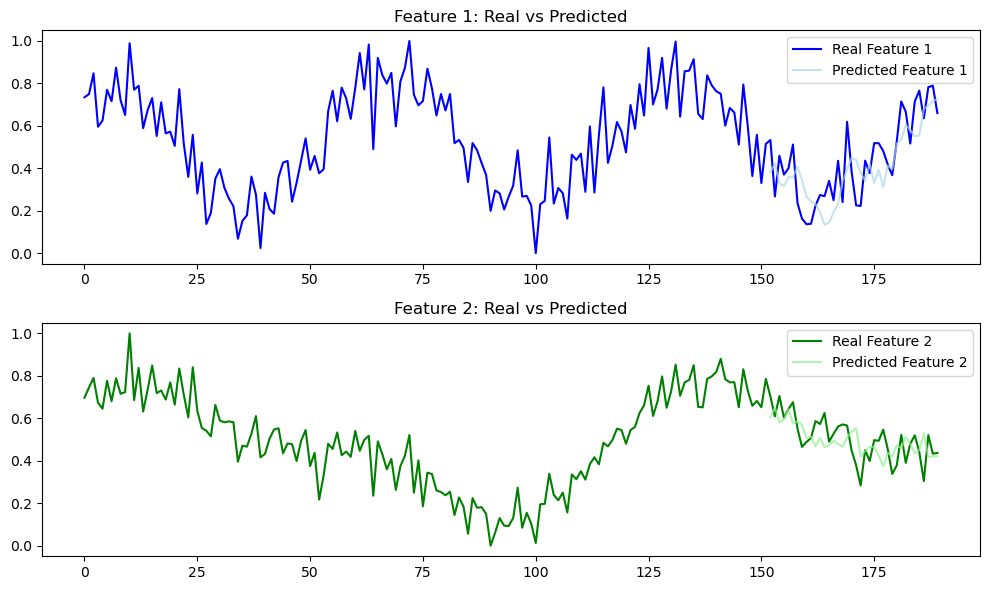

In [19]:
# Initialize empty arrays for the full sequence
full_true_sequence = np.empty((0, 2))
full_predicted_sequence = np.empty((0, 2))

# Add the Y_train data
full_true_sequence = np.vstack([full_true_sequence, Y_train])

# Add a gap (of NaN values) of the size of the test data in the predicted sequence
full_predicted_sequence = np.vstack([full_predicted_sequence, np.full((Y_train.shape[0], 2), np.nan)])

# Add the Y_test data to the true sequence
full_true_sequence = np.vstack([full_true_sequence, Y_test])

# Add the predicted values for the test data to the predicted sequence
full_predicted_sequence = np.vstack([full_predicted_sequence, predictions])

# Now, let's plot them side by side
plt.figure(figsize=(10,6))

# Plot for Feature 1
plt.subplot(2, 1, 1)
plt.plot(full_true_sequence[:, 0], label="Real Feature 1", color="blue")
plt.plot(full_predicted_sequence[:, 0], label="Predicted Feature 1", alpha=0.7, color="lightblue")
plt.title('Feature 1: Real vs Predicted')
plt.legend()

# Plot for Feature 2
plt.subplot(2, 1, 2)
plt.plot(full_true_sequence[:, 1], label="Real Feature 2", color="green")
plt.plot(full_predicted_sequence[:, 1], label="Predicted Feature 2", alpha=0.7, color="lightgreen")
plt.title('Feature 2: Real vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

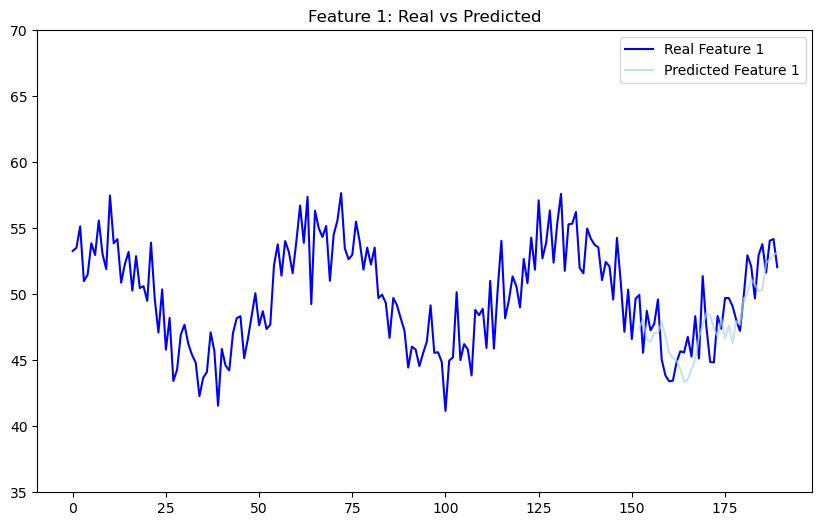

In [20]:
# Inverse transform the data back to original scale
full_true_sequence_original = scaler.inverse_transform(full_true_sequence)
full_predicted_sequence_original = scaler.inverse_transform(full_predicted_sequence)

# Now, let's plot them side by side with original scale
plt.figure(figsize=(10,6))

# Plot for Feature 1
# plt.subplot(2, 1, 1)
plt.plot(full_true_sequence_original[:, 0], label="Real Feature 1", color="blue")
plt.plot(full_predicted_sequence_original[:, 0], label="Predicted Feature 1", alpha=0.7, color="lightblue")
plt.title('Feature 1: Real vs Predicted')
plt.legend()

# Set the y-axis limits
plt.ylim(35, 70)

# # Plot for Feature 2
# plt.subplot(2, 1, 2)
# plt.plot(full_true_sequence_original[:, 1], label="Real Feature 2", color="green")
# plt.plot(full_predicted_sequence_original[:, 1], label="Predicted Feature 2", alpha=0.7, color="lightgreen")
# plt.title('Feature 2: Real vs Predicted')
# plt.legend()

# plt.tight_layout()
plt.show()

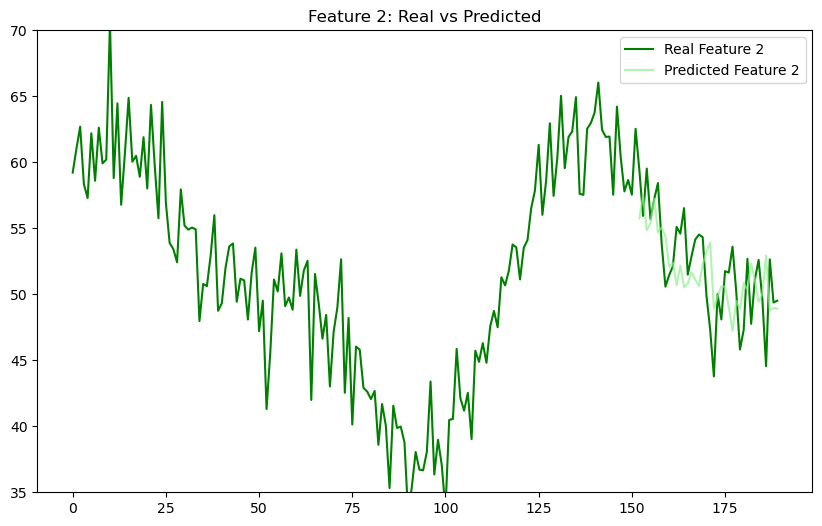

In [21]:
# Inverse transform the data back to original scale
full_true_sequence_original = scaler.inverse_transform(full_true_sequence)
full_predicted_sequence_original = scaler.inverse_transform(full_predicted_sequence)

# Now, let's plot them side by side with original scale
plt.figure(figsize=(10,6))

# # Plot for Feature 1
# # plt.subplot(2, 1, 1)
# plt.plot(full_true_sequence_original[:, 0], label="Real Feature 1", color="blue")
# plt.plot(full_predicted_sequence_original[:, 0], label="Predicted Feature 1", alpha=0.7, color="lightblue")
# plt.title('Feature 1: Real vs Predicted')
# plt.legend()



# Plot for Feature 2
# plt.subplot(2, 1, 2)
plt.plot(full_true_sequence_original[:, 1], label="Real Feature 2", color="green")
plt.plot(full_predicted_sequence_original[:, 1], label="Predicted Feature 2", alpha=0.7, color="lightgreen")
plt.title('Feature 2: Real vs Predicted')
plt.legend()

# Set the y-axis limits
plt.ylim(35, 70)

# plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_1 = mean_absolute_error(Y_test[:, 0], predictions[:, 0])
mae_2 = mean_absolute_error(Y_test[:, 1], predictions[:, 1])

rmse_1 = np.sqrt(mean_squared_error(Y_test[:, 0], predictions[:, 0]))
rmse_2 = np.sqrt(mean_squared_error(Y_test[:, 1], predictions[:, 1]))

print(f"Feature 1 - MAE: {mae_1}, RMSE: {rmse_1}")
print(f"Feature 2 - MAE: {mae_2}, RMSE: {rmse_2}")

Feature 1 - MAE: 0.11372953677072602, RMSE: 0.13027519552674488
Feature 2 - MAE: 0.07235446508200735, RMSE: 0.09132174648174773


In [23]:
data

,Feature 1,Feature 2
0,50.993428,51.709003
1,50.222638,51.843999
2,52.288724,55.453160
3,54.523661,58.125646
4,51.478785,50.710140
...,...,...
195,53.798334,49.664791
196,51.642103,44.551043
197,54.065317,52.647831
198,54.184786,49.380347


In [24]:
full_true_sequence_original

array([[53.28051954, 59.21655595],
       [53.52457729, 61.02258086],
       [55.14411997, 62.69854823],
       [50.99123044, 58.345877  ],
       [51.47741298, 57.28905137],
       [53.86289987, 62.19722592],
       [52.97220577, 58.60011625],
       [55.58681872, 62.62598556],
       [53.05319   , 59.915732  ],
       [51.90689304, 60.20479636],
       [57.47778467, 70.52181165],
       [53.86449423, 58.8041961 ],
       [54.17753843, 64.46213241],
       [50.87902969, 56.78123735],
       [52.28855045, 60.66507758],
       [53.2142059 , 64.88195329],
       [50.2755197 , 60.0396616 ],
       [52.88829544, 60.49003946],
       [50.47366337, 58.89755325],
       [50.61285915, 61.89918455],
       [49.50218682, 58.01640342],
       [53.91245968, 64.3432145 ],
       [49.68113483, 59.76801454],
       [47.09584967, 55.76129926],
       [50.36738431, 64.5719206 ],
       [45.80439656, 56.91209407],
       [48.20512497, 53.89331611],
       [43.43147905, 53.41713971],
       [44.28433845,

In [25]:
full_predicted_sequence_original

array([[        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,